In [35]:
#Library for heart data
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore') # to ignore all the warnings which might showing you up in the notebook due to past/future depreciation of a future
import matplotlib.pyplot as plt # to create charts using pyplot
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
np.arange(3)

array([0, 1, 2])

In [28]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Task\\heart.csv")

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


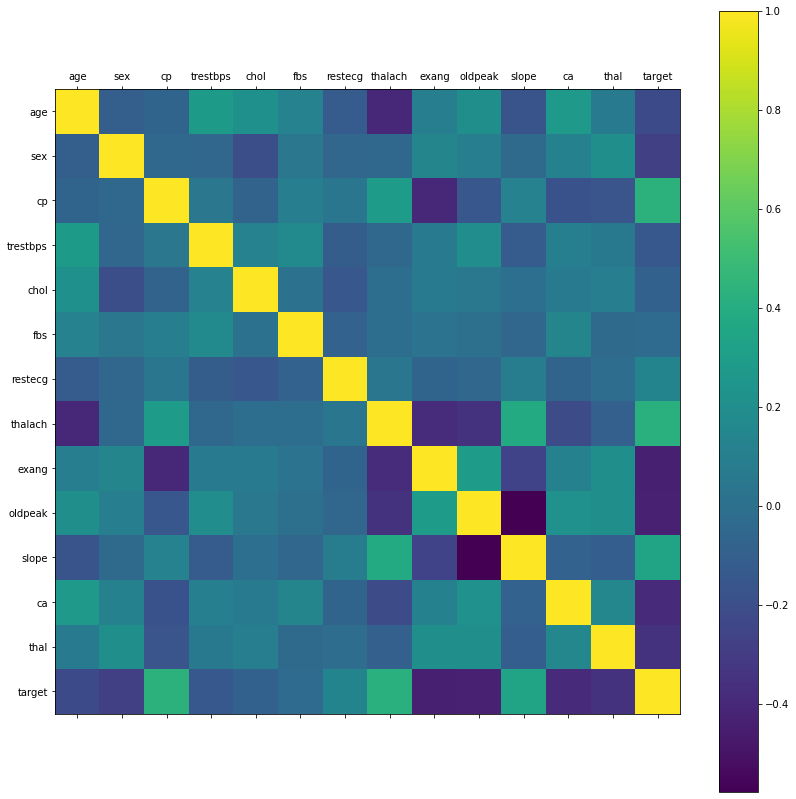

In [45]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

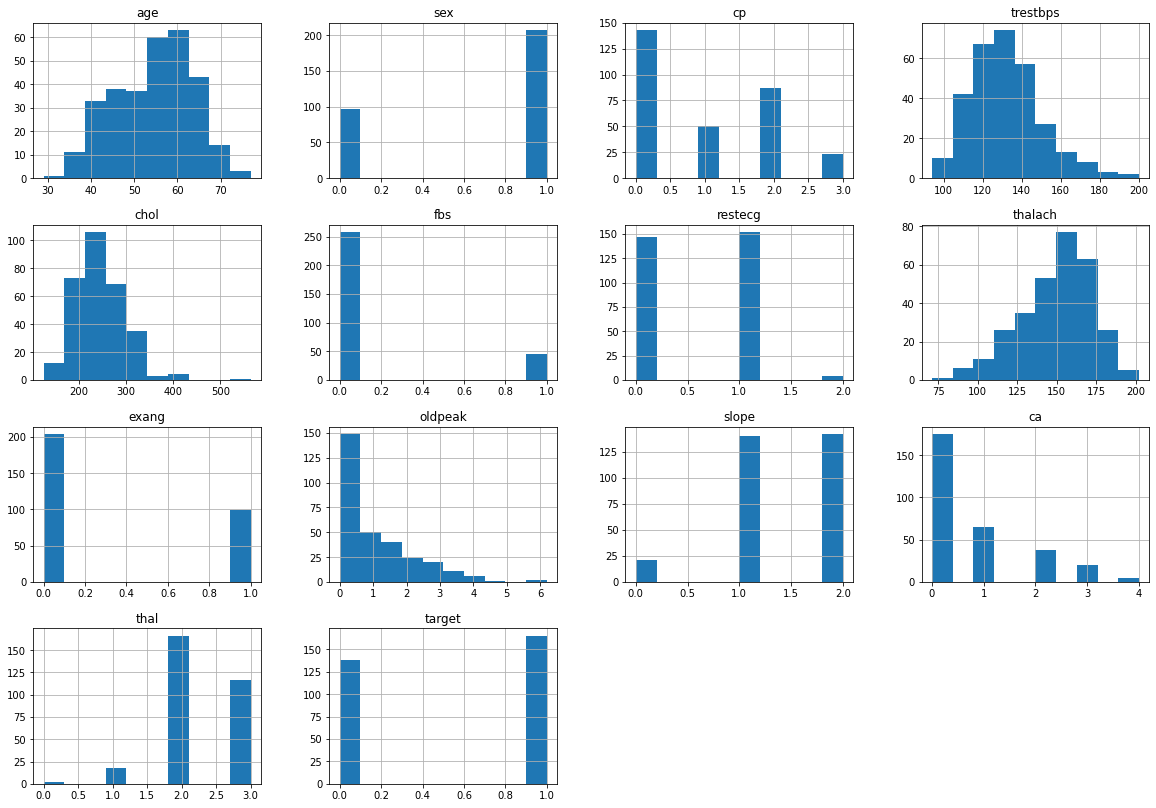

In [46]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

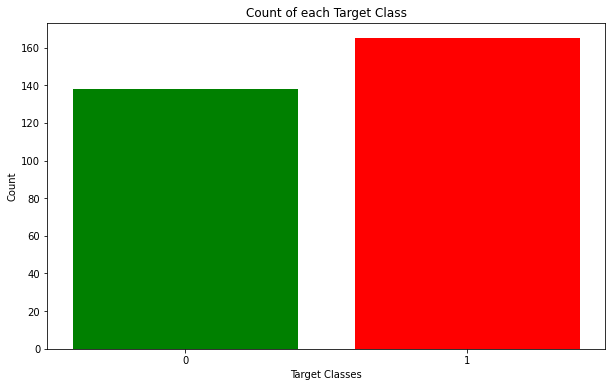

In [59]:
rcParams['figure.figsize'] = 10,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [60]:
#convert in to dummy varibale
df1 = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [61]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [62]:
#scale the cloumn 
# standard scaler function is used for scale the dataset in one label
standardScaler =StandardScaler()
scale_colum = ['age','trestbps','chol','thalach','oldpeak']
df[scale_colum] = standardScaler.fit_transform(df[scale_colum])

In [63]:
#split in training and testing dataset
y = df['target']
X = df.drop(['target'],axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)

In [64]:
# k neighbor classifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,Y_train)
    knn_scores.append(knn_classifier.score(X_test,Y_test))

Text(0.5, 1.0, 'k neighbors classifier scores for different k values')

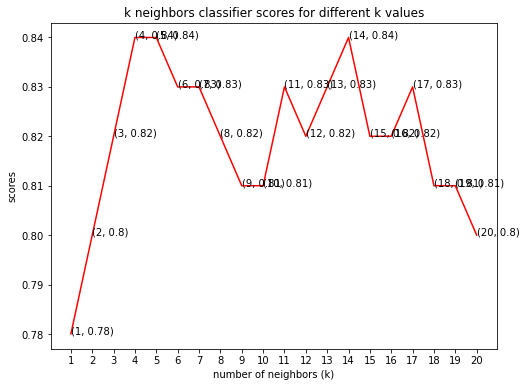

In [58]:
plt.plot([k for k in range(1,21)], knn_scores, color = 'red')
for i in range (1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of neighbors (k)')
plt.ylabel('scores')
plt.title('k neighbors classifier scores for different k values')

In [65]:
print("the score for k neighbors classifiers is {}% with {} neighbors.".format(knn_scores[7]*100,8))

the score for k neighbors classifiers is 82.0% with 8 neighbors.


In [69]:
# Support vector machine ( there are sevral kernals for support vector classifiers and check which one is best)
svc_scores = []
kernels = ['linear','poly','rbf','sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train,Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test))
    

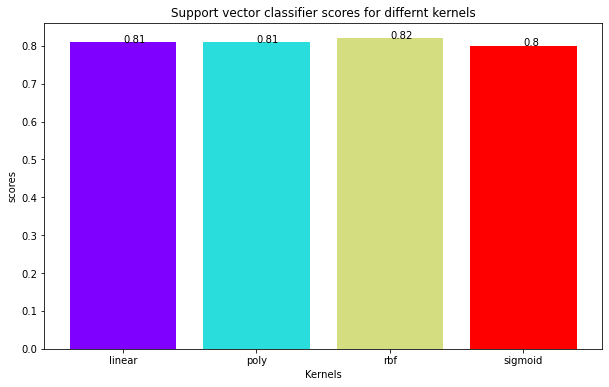

In [70]:
# plot and check which has the best scores
colors = rainbow(np.linspace(0,1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
    plt.xlabel('Kernels')
    plt.ylabel('scores')
    plt.title('Support vector classifier scores for differnt kernels')
    
    # linear kernel performed best
    

In [71]:
print('The score of support vector classifier is {}% with {} kernel.'.format(svc_scores[0]*100, 'linear'))

The score of support vector classifier is 81.0% with linear kernel.


In [72]:
#Decision tree classifier
dt_scores = []
for i in range(1, len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train,Y_train)
    dt_scores.append(dt_classifier.score(X_test,Y_test))

Text(0.5, 1.0, 'Decision tree classifier for different  number of maximum features')

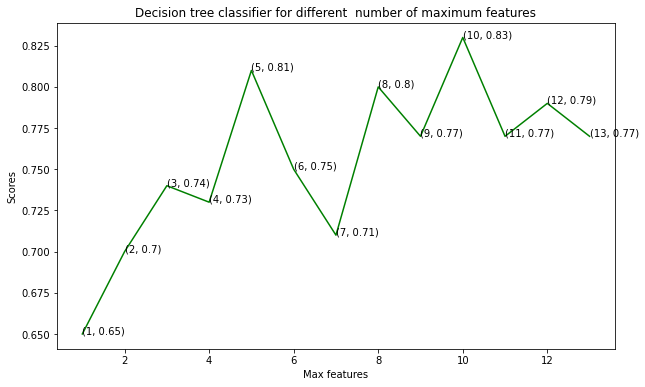

In [75]:
#plot and see the scores of each cases
plt.plot([i for i in range(1, len(X.columns)+1)],dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i,dt_scores[i-1],(i,dt_scores[i-1]))
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision tree classifier for different  number of maximum features')

In [79]:
print("The score the decision tree classifier is {}% with {} maximum features.".format(dt_scores[16]*100, [2,4,18]))

IndexError: list index out of range

In [80]:
# Random forest classifier 
rf_scores = []
estimators = [10,100,200,500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state=0)
    rf_classifier.fit(X_train, Y_train)
    rf_scores.append(rf_classifier.score(X_test,Y_test))

Text(0.5, 1.0, 'Random classifier scores of differnt number of estimators')

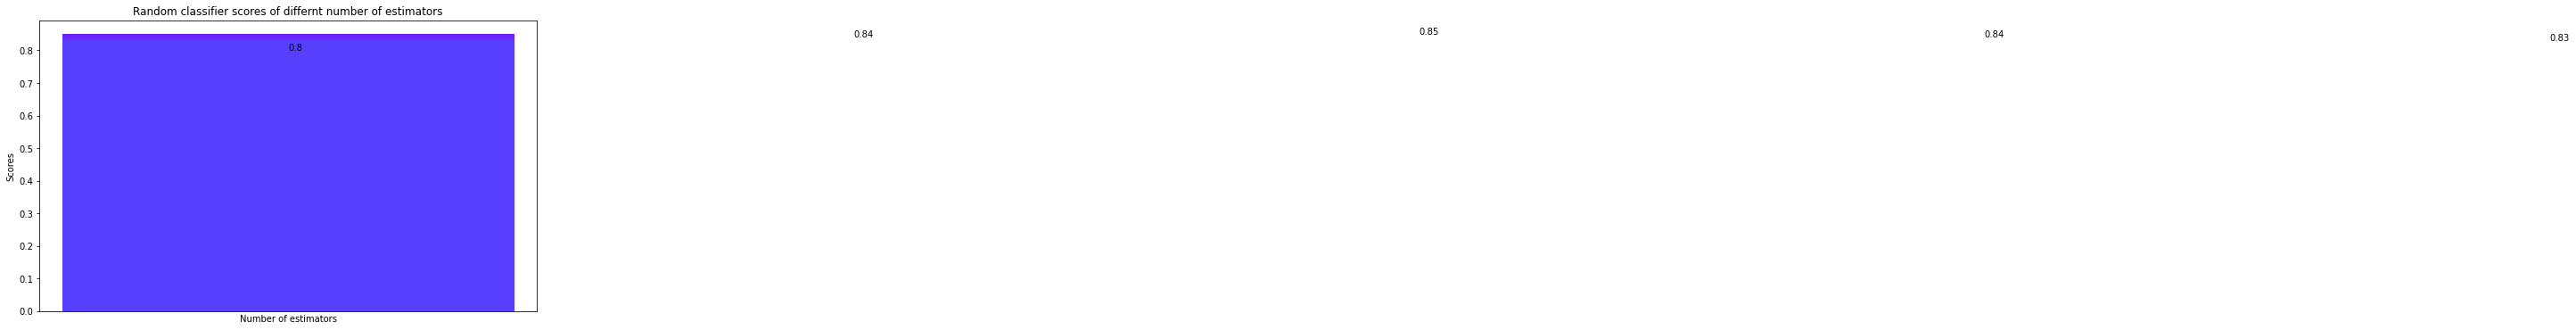

In [82]:
# models are taines and the scores are recorded,lets plot a bar plot to compare the scores
colors = rainbow(np.linspace(0,1), len(estimators))
plt.bar([i in range(len(estimators))],rf_scores, color= colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i,rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i in range(len(estimators))], label = [str(estimators) for  estimators in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random classifier scores of differnt number of estimators')

In [83]:
print("The score of random classifier is {}% with {} estimators.".format(rf_scores[1]*100,[100,500]))

The score of random classifier is 84.0% with [100, 500] estimators.
